<a href="https://colab.research.google.com/github/gabrieladamasceno/Attacks_5G/blob/main/MLP_Multiclasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Acessar dataset
drive.mount('/content/gdrive')

# Carregar o dataset
encoded = pd.read_csv("/content/gdrive/MyDrive/Datasets/Attacks/Encoded/Encoded.csv")

Mounted at /content/gdrive


In [64]:
pip install imbalanced-learn


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [66]:
# Usando shape
num_amostras = encoded.shape[0]
print(f"Número de amostras: {num_amostras}")

# Usando len()
num_amostras_len = len(encoded)
print(f"Número de amostras (usando len): {num_amostras_len}")

Número de amostras: 1215890
Número de amostras (usando len): 1215890


In [67]:
# Exibir os nomes de todas as colunas
colunas = encoded.columns.tolist()  # Converte o Index em uma lista
print("Nomes das colunas:")
for coluna in colunas:
    print(coluna)

Nomes das colunas:
Unnamed: 0
Seq
Dur
RunTime
Mean
Sum
Min
Max
sTos
dTos
sTtl
dTtl
sHops
dHops
TotPkts
SrcPkts
DstPkts
TotBytes
SrcBytes
DstBytes
Offset
sMeanPktSz
dMeanPktSz
Load
SrcLoad
DstLoad
Loss
SrcLoss
DstLoss
pLoss
SrcGap
DstGap
Rate
SrcRate
DstRate
SrcWin
DstWin
sVid
dVid
SrcTCPBase
DstTCPBase
TcpRtt
SynAck
AckDat
Label
Attack Type
Attack Tool
 *        
 *    V   
 *    f   
 e        
 e    f   
 e &      
 e *      
 e d      
 e g      
 e i      
 e r      
 e s      
 eU       
e        
arp
icmp
ipv6-icmp
llc
lldp
sctp
tcp
udp
ACC
CON
ECO
FIN
INT
NRS
REQ
RSP
RST
TST
URP
Shutdown
Start
Status
39
4
52
54
af11
af12
af41
cs0
cs4
cs6
cs7
ef
nan


In [68]:
# Selecionar apenas colunas numéricas
numeric_cols = encoded.select_dtypes(include=['number']).columns

# Aplicar a suavização apenas nas colunas numéricas
for col in numeric_cols:
    encoded[col] = encoded[col].fillna(encoded[col].mean())

In [69]:
# columns with null values

columns_null = []
columns = encoded.columns
for column in columns:
    c = encoded[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

Features
* Seq: Sequência de pacotes.
* Offset: Deslocamento em bytes.
* sTtl: Time to Live da fonte.
* tcp: Indica se o protocolo TCP está sendo usado.
* AckDat: Dados de reconhecimento.
* RST: Sinalizador de reinício TCP.
* INT: Interrupções no fluxo de dados.
* TcpRtt: Tempo de ida e volta do TCP.
* icmp: Indica se o protocolo ICMP está presente.
* sMeanPktSz: Tamanho médio do pacote da fonte.
* FIN: Sinalizador de finalização de conexão.
* sHops: Número de saltos até o destino.
* Mean: Valor médio de um conjunto de dados.
* dTtl: Time to Live do destino.
* SrcBytes: Bytes enviados da fonte.
* TotBytes: Total de bytes.
* dMeanPktSz: Tamanho médio do pacote do destino.
* Status: Estado da conexão.
* cs0: Parâmetro de controle.
* SrcWin: Janela de origem TCP.
* sTos: Tipo de serviço.
* CON: Conexões.
* REQ: Requisições.
* Loss: Taxa de perda de pacotes.

In [70]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam



# Definir as features que você deseja usar
features = ['tcp', 'AckDat', 'sHops', 'Seq', 'RST', 'TcpRtt', 'REQ', 'dMeanPktSz', 'Offset',
            'CON', 'FIN', 'sTtl', 'e        ', 'INT', 'Mean', 'Status', 'icmp', 'SrcTCPBase',
            'sMeanPktSz', 'DstLoss', 'Loss', 'dTtl', 'SrcBytes', 'TotBytes']


# Separar as features e os rótulos
X = encoded[features]  # Usar apenas as colunas selecionadas

le = LabelEncoder()
y = le.fit_transform(encoded['Attack Type'])  # Codifica como inteiros

# Identificar colunas categóricas (se houver)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Aplicar OneHotEncoder nas colunas categóricas
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Codificar colunas categóricas
    ],
    remainder='passthrough'  # Manter as colunas numéricas
)

X = transformer.fit_transform(X)  # Transformar as features

# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [72]:
print("Amostras de treino:", len(X_train))
print("Amostras de teste:", len(X_test))

Amostras de treino: 972712
Amostras de teste: 243178


In [73]:
import psutil
import time
from keras.callbacks import Callback

# Função para monitorar recursos
def monitor_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = psutil.cpu_percent(interval=0.1)
    memory_usage_mb = memory_info.rss / (1024 * 1024)
    return cpu_percent, memory_usage_mb

# Callback personalizado para monitorar CPU e memória
class ResourceMonitor(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        # Antes da época começar
        self.start_time = time.time()
        self.start_cpu, self.start_memory = monitor_resource_usage()
        print(f"\n[Início da Época {epoch + 1}]")
        print(f"CPU inicial: {self.start_cpu:.2f}%, Memória inicial: {self.start_memory:.2f} MB")

    def on_epoch_end(self, epoch, logs=None):
        # Após a época terminar
        end_time = time.time()
        end_cpu, end_memory = monitor_resource_usage()
        elapsed_time = end_time - self.start_time
        memory_diff = end_memory - self.start_memory

        print(f"[Fim da Época {epoch + 1}]")
        print(f"CPU final: {end_cpu:.2f}%, Memória consumida: {memory_diff:.2f} MB, Tempo gasto: {elapsed_time:.2f} segundos")

# Instanciar o callback
resource_monitor = ResourceMonitor()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from keras.regularizers import l2
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

num_classes = 9


# Converter y_train e y_test para one-hot encoding
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Criar modelo sequencial
model = Sequential()

# Adicionar camadas
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Saída para múltiplas classes


# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, resource_monitor]) #coloquei o batch size como 32
monitor_resource_usage()
time.sleep(1)


[Início da Época 1]
CPU inicial: 0.10%, Memória inicial: 7950.67 MB
Epoch 1/50
30398/30398 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9945[Fim da Época 1]
CPU final: 1.30%, Memória consumida: 29.60 MB, Tempo gasto: 57.12 segundos
30398/30398 [==============================] - 57s 2ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.0074 - val_accuracy: 0.9975

[Início da Época 2]
CPU inicial: 1.30%, Memória inicial: 7980.27 MB
Epoch 2/50
30368/30398 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9973[Fim da Época 2]
CPU final: 0.10%, Memória consumida: 8.54 MB, Tempo gasto: 57.81 segundos
30398/30398 [==============================] - 58s 2ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0079 - val_accuracy: 0.9969

[Início da Época 3]
CPU inicial: 0.60%, Memória inicial: 7988.81 MB
Epoch 3/50
30385/30398 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9976[Fim da Época 3]
CPU final: 0.40%, Memóri

In [75]:
print(X_train.shape)  # Deve ser algo como (n amostras, n características)

(972712, 24)


In [76]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

7600/7600 [==============================] - 9s 1ms/step


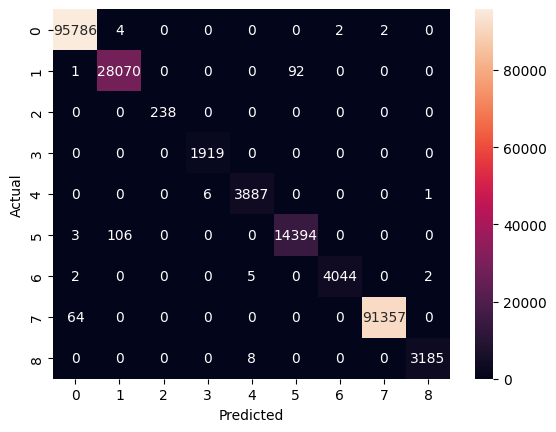

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95794
           1       1.00      1.00      1.00     28163
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00      1919
           4       1.00      1.00      1.00      3894
           5       0.99      0.99      0.99     14503
           6       1.00      1.00      1.00      4053
           7       1.00      1.00      1.00     91421
           8       1.00      1.00      1.00      3193

    accuracy                           1.00    243178
   macro avg       1.00      1.00      1.00    243178
weighted avg       1.00      1.00      1.00    243178



In [77]:
#Matriz de Confusão

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Matriz de Confusão
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Relatório detalhado
print(classification_report(y_test_classes, y_pred_classes))

7600/7600 [==============================] - 8s 1ms/step


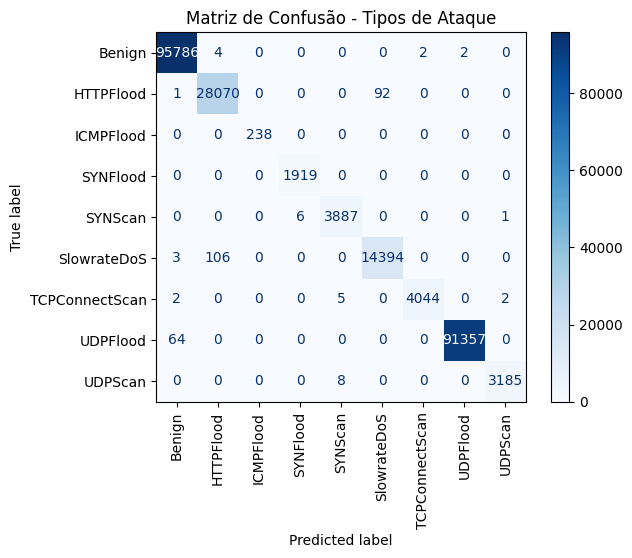

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supondo que o dataset esteja em um DataFrame chamado 'df'
# Extrair as classes únicas da coluna "Attack Type"
attack_types = encoded['Attack Type'].unique()

# Garantir que as classes estejam ordenadas (opcional, dependendo da codificação do modelo)
attack_types = sorted(attack_types)

# Previsões e rótulos reais
y_pred = model.predict(X_test).argmax(axis=1)  # Obter as classes previstas
y_true = y_test.argmax(axis=1)                # Rótulos reais

# Criar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Visualizar a matriz de confusão com os nomes das classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=attack_types)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Título opcional
plt.title("Matriz de Confusão - Tipos de Ataque")
plt.show()

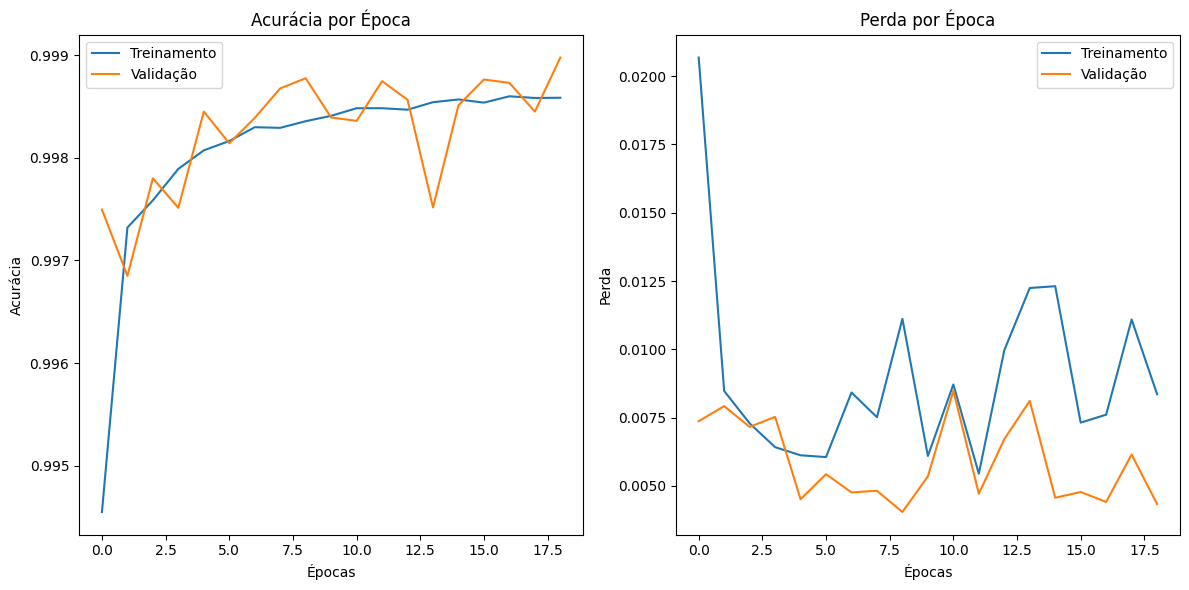

In [80]:
# Gráfico de Acurácia
plt.figure(figsize=(12, 6))

# Acurácia de treino
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supondo que 'model' seja seu modelo treinado
y_pred_prob = model.predict(X_test).flatten()  # Usando .flatten() para transformar em um vetor 1D

7600/7600 [==============================] - 8s 1ms/step


7600/7600 [==============================] - 9s 1ms/step


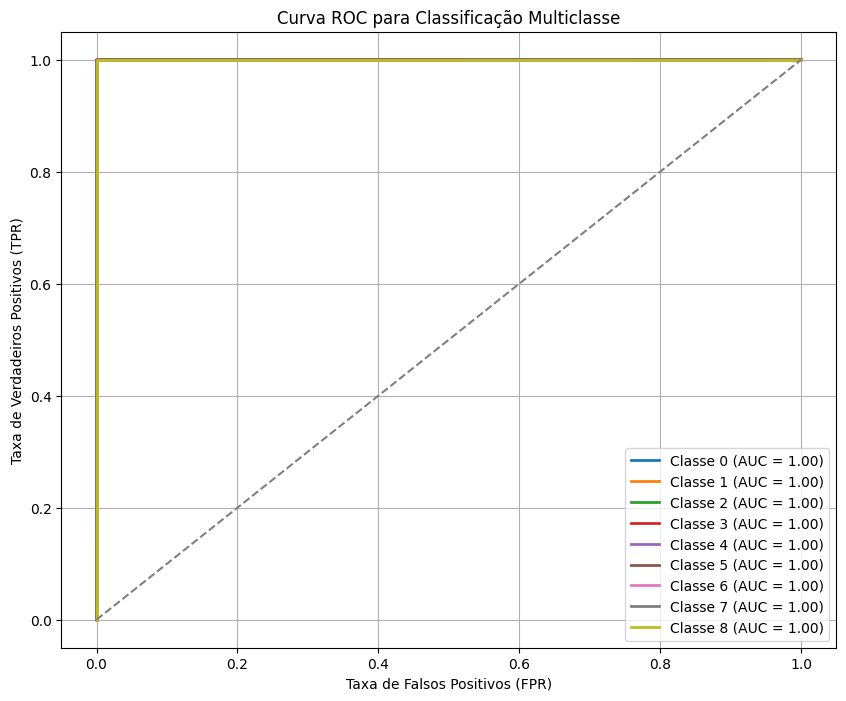

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Obter as probabilidades preditas
y_pred_proba = model.predict(X_test)  # shape: (n_samples, num_classes)

# Se os rótulos não estiverem em one-hot encoded, você deve binarizá-los
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=[i for i in range(num_classes)])

# Inicializar a plotagem
plt.figure(figsize=(10, 8))

# Calcular a curva ROC para cada classe
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC para a classe 'i'
    plt.plot(fpr, tpr, lw=2, label=f'Classe {i} (AUC = {roc_auc:.2f})')

# Adicionar a diagonal (caso aleatório)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Definir título e labels
plt.title('Curva ROC para Classificação Multiclasse')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


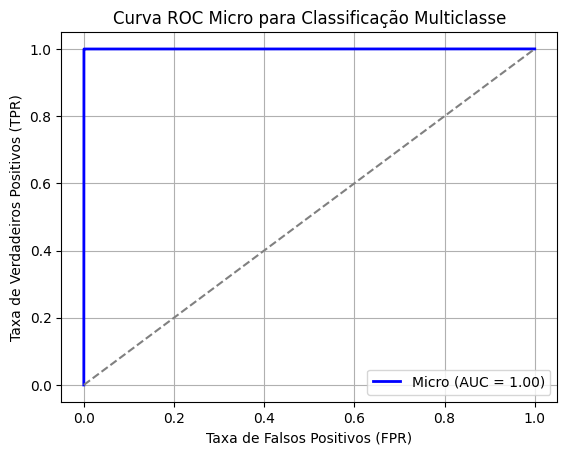

In [83]:
# Calcular a curva ROC "micro"
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr, tpr)

# Plotar a curva ROC "micro"
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Micro (AUC = {roc_auc_micro:.2f})')

# Adicionar a diagonal (caso aleatório)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Definir título e labels
plt.title('Curva ROC Micro para Classificação Multiclasse')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
